In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pl
import seaborn as sns
sns.set_style('whitegrid')

# UDPNY 2018 - _phase #3_
# _new edition according to udp methodology and revision - September '18_

This code defines the _**8 displacement typologies**_ and assignes each tract to a typology. 

- [UDP's methodology / displacement typollogies](https://drive.google.com/file/d/1nwOoVItI5RLLILrFpbTRoXbrjIohnSPY/view)

In [4]:
data = pd.read_stata("UDP_NYC_Variables.dta")
print(data.shape)
data.head()

(5338, 89)


,GEOid2,hh16,moe_hh16,per_col00,per_nonwhite00,per_rent00,vli2000,li2000,mi2000,hmi2000,...,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,hinc00,hinc90,pct_ch_hinc90_00,pct_ch_hinc00_16
0,09001010101,1348.0,106.0,0.633120,0.066080,0.128119,0.097024,0.082058,0.058617,0.036841,...,4277.000000,0.516292,84.0,150655.0,21659.0,-529.0,273976.05,173204.009350,0.581811,-0.450116
1,09001010102,1293.0,100.0,0.748477,0.098972,0.108108,0.097878,0.055028,0.057780,0.040756,...,4273.694824,0.619490,71.0,250000.0,NaN,-302.0,290000.00,274501.826719,0.056459,-0.137931
2,09001010201,991.0,75.0,0.704225,0.088501,0.137864,0.055506,0.036763,0.027295,0.033678,...,3156.218236,0.602177,53.0,212448.0,58671.0,-158.0,290000.00,273595.114640,0.059960,-0.267421
3,09001010202,1856.0,99.0,0.621305,0.130701,0.213789,0.127129,0.112302,0.072605,0.062817,...,4725.289978,0.597040,82.0,187875.0,31078.0,328.0,157543.95,157618.518565,-0.000473,0.192524
4,09001010300,1435.0,111.0,0.716889,0.103641,0.273834,0.095201,0.074789,0.058684,0.052763,...,4036.000000,0.647751,85.0,221250.0,44939.0,-71.0,246540.60,186207.991984,0.324007,-0.102582


In [7]:
list(data.columns)

['GEOid2',
 'hh16',
 'moe_hh16',
 'per_col00',
 'per_nonwhite00',
 'per_rent00',
 'vli2000',
 'li2000',
 'mi2000',
 'hmi2000',
 'hi2000',
 'vhi2000',
 'per_all_li00',
 'hh00',
 'all_li_count00',
 'per_nonwhite90',
 'per_rent90',
 'vli1990',
 'li1990',
 'mi1990',
 'hmi1990',
 'hi1990',
 'vhi1990',
 'denominator',
 'per_all_li90',
 'all_li_count90',
 'pop00',
 'pop16',
 'moe_pop16',
 'ch_all_li_count90_00',
 'ch_all_li_count00_16',
 'moveinincd16',
 'co_med_indinc16',
 'per_limove16',
 'per_limove09',
 'TOD',
 'empd15',
 'mrent90',
 'rou90',
 'mrent00',
 'rou00',
 'mrent16',
 'moe_mrent16',
 'mhval90',
 'ohu90',
 'mhval00',
 'ohu00',
 'mhval16',
 'moe_mhval16',
 'mhval90_00',
 'mhval00_16',
 'mrent90_00',
 'mrent00_16',
 'hu16',
 'per_units_pre50',
 'ohu16',
 'moe_owner16',
 'rhu16',
 'moe_renter16',
 'per_rent16',
 'per_nonwhite16',
 'vli2016',
 'li2016',
 'mi2016',
 'hmi2016',
 'hi2016',
 'vhi2016',
 'per_all_li16',
 'all_li_count16',
 'ag25up',
 'bachelors',
 'moe_bachelors',
 'master

## Data cleaning
- Dropping tracts with population less than 500 (2016)
- Dropping tracts with more than 5 'Null' columns

In [6]:
# Dropping tracts with population less than 500 (2016)
data = data[data['pop16'] > 500]
# Dropping tracts with more than 5 'Null' columns
data = data[data.isnull().sum(axis=1) <= 5]

data.shape

(5192, 89)

#### Coefficient of variation of MOE
  _If any individual variable is missing, then the whole typology is missing._<br>
    **Tracts with a coefficient of variation > 20% on several key 2015 variables are flagged and determined unreliable:**
- Population -- V
- Housing units -- V
- Median rent -- V
- Median home value -- V
- Median income  -- **_no MOE in the data_**
- College count
- Renter count -- V

In [9]:
# Population
data = data[(data.moe_pop16 / 1.645 ) / data.pop16 <= 0.3]
# Housing Units
data = data[(data.moe_hu16 / 1.645 ) / data.hu16 <= 0.3]
# Bachelors count
data = data[(data.moe_bachelors / 1.645 ) / data.bachelors <= 0.3]

# Renter counts, Median rent, Median home value
# dividing data to ct with majority of renters vs homeowners
datarent = data[data.per_rent16 > 0.5]
dataowner = data[data.per_rent16 <= 0.5]

# Renter count, ownership counts
datarent = datarent[(datarent.moe_renter16 / 1.645)  / datarent.rhu16 <= 0.3]
dataowner = dataowner[(dataowner.moe_owner16 / 1.645 ) / dataowner.ohu16 <= 0.3]

# Median rent, Median home value
datarent = datarent[(datarent.moe_mrent16 / 1.645)  / datarent.mrent16 <= 0.3]
dataowner = dataowner[(dataowner.moe_mhval16 / 1.645 ) / dataowner.mhval16 <= 0.3]

# concatenating two datasets back to 'data'
data = [dataowner, datarent]
data = pd.concat(data)
data.shape

(4758, 89)

In [10]:
(5192-4758) / 5192

0.08359013867488443

### _4,758 CT were found valid for the analysis -- 8.3% were dropped._

----
# UDP Typologies
### _8 Typologies_ to be generated to the displacement map:

### Low Income:
1. VLI - Highly Vulnerable >> _**an additional layer on top of assigned typologies**_
2. LI - Stable (Not Losing Low-Income Households)
3. LI - At Risk of Gentrification 
4. LI - Ongoing Gentrification 

### Moderate to High Income:
5. MHI - Advanced / Completed Gentrification
6. MHI - Stable (Not Losing Low-Income Households)
7. MHI - At Risk of Exclusion
8. MHI - Exclusion 

In [20]:
data.shape

(4758, 89)

In [21]:
print(data['pop16'].mean())
print(data['pop16'].std())

4437.259142496848
1932.479370509086


# Create necessary variables:

## VLI - Very Low Income tract
- vhi2016

In [22]:
data.vhi2016.head()

0     0.572832
3     0.602466
5     0.395652
9     0.506741
10    0.513434
Name: vhi2016, dtype: float32

In [23]:
# Calculating median for vli and vli % of all hh in tract

median_vli = data['vli2016'].median()
print("the median of very low income and very low income households at the year 2016 from total households, "  
      "of all census tracts is:", median_vli)

the median of very low income and very low income households at the year 2016 from total households, of all census tracts is: 0.22656558454036713


In [24]:
# VLI tract (2016)

data['vli_tract16'] = np.where(data['vli2016'] > 0.5, 1, 0)
data['vli_tract16'].value_counts()

0    4564
1     194
Name: vli_tract16, dtype: int64

## Low Income tract
- calculate the median % of all tracts
- Binary output (0 == low income tract; 1 = not a low income tract)

In [25]:
data.iloc[:,61:63].head()

,vli2016,li2016
0,0.207723,0.090243
3,0.097898,0.097730
5,0.165613,0.083121
9,0.136574,0.180567
10,0.148093,0.128081


In [26]:
# Calculating median for li and vli % of all hh in tract

medianli = data['vli2016'].median() + data['li2016'].median()
print("the median of low income and very low income households at the year 2016 from total households, "  
      "of all census tracts is:", medianli)

the median of low income and very low income households at the year 2016 from total households, of all census tracts is: 0.36866429448127747


In [27]:
# 2016

data['li_tract16'] = np.where(data['vli2016']+data['li2016'] > medianli, 1, 0)
data.iloc[:,-1:].head(10)

,li_tract16
0,0
3,0
5,0
9,0
10,0
11,0
12,0
16,0
17,0
18,0


In [28]:
data['li_tract16'].value_counts()

1    2521
0    2237
Name: li_tract16, dtype: int64

In [29]:
# 2000

data['li_tract00'] = np.where(data['vli2000']+data['li2000'] > (data['vli2000'].median() + data['li2000'].median()), 1, 0)
data.iloc[:,-2:].head(10)

,li_tract16,li_tract00
0,0,0
3,0,0
5,0,0
9,0,0
10,0,0
11,0,0
12,0,0
16,0,0
17,0,0
18,0,0


In [30]:
# 1990

data['li_tract90'] = np.where(data['vli1990']+data['li1990'] > (data['vli1990'].median() + data['li1990'].median()), 1, 0)
data.iloc[:,-3:].head(10)

,li_tract16,li_tract00,li_tract90
0,0,0,0
3,0,0,0
5,0,0,1
9,0,0,0
10,0,0,0
11,0,0,0
12,0,0,0
16,0,0,0
17,0,0,0
18,0,0,0


In [31]:
print('LI HH 2000:\n', data['li_tract00'].value_counts())
print('\nLI HH 1990:\n', data['li_tract90'].value_counts())

LI HH 2000:
 1    2491
0    2267
Name: li_tract00, dtype: int64

LI HH 1990:
 1    2513
0    2245
Name: li_tract90, dtype: int64


### Define % college educated < regional median 

In [32]:
data['per_col00'].median()

0.2567002773284912

In [33]:
data['edulow90'] = np.where(data['per_col90'] < data['per_col90'].median(), 1, 0)
data['edulow00'] = np.where(data['per_col00'] < data['per_col00'].median(), 1, 0)
data.iloc[:,-4:].head(7)

,li_tract00,li_tract90,edulow90,edulow00
0,0,0,0,0
3,0,0,0,0
5,0,1,0,0
9,0,0,0,0
10,0,0,0,0
11,0,0,0,0
12,0,0,0,0


### Define % renters > regional median

In [34]:
data['per_rent00'].median()

0.4009764790534973

In [35]:
data['renters%90'] = np.where(data['per_rent90'] > data['per_rent90'].median(), 1, 0)
data['renters%00'] = np.where(data['per_rent00'] > data['per_rent00'].median(), 1, 0)
data['renters%16'] = np.where(data['per_rent16'] > data['per_rent16'].median(), 1, 0)

data.iloc[:,-5:].head(7)

,edulow90,edulow00,renters%90,renters%00,renters%16
0,0,0,0,0,0
3,0,0,0,0,0
5,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0


### Define % nonwhite > regional median

In [36]:
data['per_nonwhite00'].median()

0.2858666479587555

In [37]:
data['nonwhiteHigh90'] = np.where(data['per_nonwhite90'] > data['per_nonwhite90'].median(), 1, 0)
data['nonwhiteHigh00'] = np.where(data['per_nonwhite00'] > data['per_nonwhite00'].median(), 1, 0)
data['nonwhiteHigh16'] = np.where(data['per_nonwhite16'] > data['per_nonwhite16'].median(), 1, 0)
data.iloc[:,-5:].head(7)

,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16
0,0,0,0,0,0
3,0,0,0,0,0
5,0,0,0,0,0
9,0,0,0,0,0
10,0,0,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0


### Define Severe Rent Burden 2016 -- DIDN"T WORK! CHECK AGAIN

In [38]:
data[data['mrent16']/data['hinc16'] > 0.3]

,GEOid2,hh16,moe_hh16,per_col00,per_nonwhite00,per_rent00,vli2000,li2000,mi2000,hmi2000,...,li_tract00,li_tract90,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16


# Vulnerability 1990 / 2000 // 3 out of 4 of the above for each year
- % low income households > regional median
- college educated < regional median
- renters > regional median
- nonwhite > regional median

In [39]:
# vulnerable 1990

def volnurable90(df):
    if df['li_tract90'] == 1 and df['edulow90'] == 1 and df['renters%90'] == 1:
        val = 1
    elif df['li_tract90'] == 1 and df['edulow90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    elif df['li_tract90'] == 1 and df['renters%90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    elif df['edulow90'] == 1 and df['renters%90'] == 1 and df['nonwhiteHigh90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [40]:
data['Volnurable90'] = data.apply(volnurable90, axis=1)
data[10:16]

,GEOid2,hh16,moe_hh16,per_col00,per_nonwhite00,per_rent00,vli2000,li2000,mi2000,hmi2000,...,li_tract90,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90
19,09001020500,1715.0,69.0,0.560989,0.112982,0.100000,0.111704,0.090183,0.078906,0.065822,...,0,0,0,0,0,0,0,0,0,0
20,09001020600,1691.0,77.0,0.404769,0.165809,0.097722,0.196649,0.090011,0.079509,0.112833,...,0,0,0,0,0,0,0,0,0,0
21,09001020700,1597.0,60.0,0.432836,0.125184,0.138121,0.214971,0.099719,0.093306,0.099693,...,0,0,0,0,0,0,0,0,0,0
22,09001020800,963.0,34.0,0.434267,0.081625,0.033473,0.130064,0.137648,0.049873,0.099999,...,0,0,0,0,0,0,0,0,0,0
23,09001020900,2103.0,73.0,0.428743,0.211177,0.371636,0.247000,0.175742,0.106253,0.103783,...,1,0,0,1,0,0,0,0,1,0
24,09001021000,1216.0,73.0,0.388982,0.199408,0.193836,0.263976,0.111757,0.101140,0.074843,...,1,0,0,0,0,0,0,0,0,0


In [41]:
# Volnurable 2000

def volnurable00(df):
    if df['li_tract00'] == 1 and df['edulow00'] == 1 and df['renters%00'] == 1:
        val = 1
    elif df['li_tract00'] == 1 and df['edulow00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    elif df['li_tract00'] == 1 and df['renters%00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    elif df['edulow00'] == 1 and df['renters%00'] == 1 and df['nonwhiteHigh00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [42]:
data['Volnurable00'] = data.apply(volnurable00, axis=1)
data[10:16]

,GEOid2,hh16,moe_hh16,per_col00,per_nonwhite00,per_rent00,vli2000,li2000,mi2000,hmi2000,...,edulow90,edulow00,renters%90,renters%00,renters%16,nonwhiteHigh90,nonwhiteHigh00,nonwhiteHigh16,Volnurable90,Volnurable00
19,09001020500,1715.0,69.0,0.560989,0.112982,0.100000,0.111704,0.090183,0.078906,0.065822,...,0,0,0,0,0,0,0,0,0,0
20,09001020600,1691.0,77.0,0.404769,0.165809,0.097722,0.196649,0.090011,0.079509,0.112833,...,0,0,0,0,0,0,0,0,0,0
21,09001020700,1597.0,60.0,0.432836,0.125184,0.138121,0.214971,0.099719,0.093306,0.099693,...,0,0,0,0,0,0,0,0,0,0
22,09001020800,963.0,34.0,0.434267,0.081625,0.033473,0.130064,0.137648,0.049873,0.099999,...,0,0,0,0,0,0,0,0,0,0
23,09001020900,2103.0,73.0,0.428743,0.211177,0.371636,0.247000,0.175742,0.106253,0.103783,...,0,0,1,0,0,0,0,1,0,0
24,09001021000,1216.0,73.0,0.388982,0.199408,0.193836,0.263976,0.111757,0.101140,0.074843,...,0,0,0,0,0,0,0,0,0,0


In [43]:
data['Volnurable90'].value_counts()

0    2828
1    1930
Name: Volnurable90, dtype: int64

In [44]:
data['Volnurable00'].value_counts()

0    2801
1    1957
Name: Volnurable00, dtype: int64

### 2123 census tracts were found Volnurable in 1990, while 2159 were found Volnurable in 2000

---

### Rail station (TOD)

In [45]:
data['TOD'].value_counts()

0.0    4012
1.0     746
Name: TOD, dtype: int64

## Define % of units in pre-1950 buildings > regional median

In [46]:
data['units_pre50_High'] = np.where(data['per_units_pre50'] > data['per_units_pre50'].median(), 1, 0)
data.iloc[:,-3:].head(7)

,Volnurable90,Volnurable00,units_pre50_High
0,0,0,0
3,0,0,0
5,0,0,0
9,0,0,1
10,0,0,0
11,0,0,1
12,0,0,1


## Define Employment density (2015) > regional median

In [47]:
data['empdens14_High'] = np.where(data['empd15'] > data['empd15'].median(), 1, 0)
data.iloc[:,-3:].head(7)

,Volnurable00,units_pre50_High,empdens14_High
0,0,0,0
3,0,0,0
5,0,0,0
9,0,1,1
10,0,0,0
11,0,1,0
12,0,1,0


## Define rent change 00-16 and home value change 00-16 > regional median

In [48]:
# 1990 base
data['rentchange_High90'] = np.where(data['mrent90_00'] > data['mrent90_00'].median(), 1, 0)
data['rhomeValchange_High90'] = np.where(data['mrent90_00'] > data['mrent90_00'].median(), 1, 0)

# 2000 base
data['rentchange_High00'] = np.where(data['mrent00_16'] > data['mrent00_16'].median(), 1, 0)
data['rhomeValchange_High00'] = np.where(data['mhval00_16'] > data['mhval00_16'].median(), 1, 0)

data.iloc[:,-3:].head(7)

,rhomeValchange_High90,rentchange_High00,rhomeValchange_High00
0,1,0,0
3,1,0,0
5,1,0,0
9,1,0,0
10,1,0,1
11,1,0,1
12,1,0,0


## Define "Hot Market"
one out of two options of changing market (rent / home value)

In [49]:
def hotmarket90(df):
    if df['rentchange_High90'] == 1 or df['rhomeValchange_High90'] == 1 and df['rentchange_High90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [50]:
def hotmarket00(df):
    if df['rentchange_High00'] == 1 or df['rhomeValchange_High00'] == 1 and df['rentchange_High00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [51]:
data['hotmarket90'] = data.apply(hotmarket90, axis=1)
data['hotmarket00'] = data.apply(hotmarket00, axis=1)
data.iloc[:,-6:].head(7)

,rentchange_High90,rhomeValchange_High90,rentchange_High00,rhomeValchange_High00,hotmarket90,hotmarket00
0,1,1,0,0,1,0
3,1,1,0,0,1,0
5,1,1,0,0,1,0
9,1,1,0,0,1,0
10,1,1,0,1,1,0
11,1,1,0,1,1,0
12,1,1,0,0,1,0


## Define risk0
2 out of the 4 of the following is true in 2016 (select only one 'hot market' from the 2 'hot market' option)
- Has rail station in tract
- % of units in pre-1950 buildings > regional median
- Employment density (2014)> regional median
- “Hot market”

In [52]:
# risk 1990

def risk90(df):
    if df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['empdens14_High'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['empdens14_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    elif df['units_pre50_High'] == 1 and df['empdens14_High'] == 1 and df['hotmarket90'] == 1:
        val = 1
    else:
        val = 0
    return val

In [53]:
# risk 2000

def risk00(df):
    if df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['empdens14_High'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['units_pre50_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    elif df['TOD'] == 1 and df['empdens14_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    elif df['units_pre50_High'] == 1 and df['empdens14_High'] == 1 and df['hotmarket00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [54]:
data['risk90'] = data.apply(risk90, axis=1)
data['risk90'].value_counts()

0    3386
1    1372
Name: risk90, dtype: int64

In [55]:
data['risk00'] = data.apply(risk00, axis=1)
data['risk00'].value_counts()

0    3400
1    1358
Name: risk00, dtype: int64

In [56]:
# create a df with only low income tracts

df_LI = data[data['li_tract16'] == 1]
df_LI.shape

(2521, 113)

### There are 2760 LI tracts in the NY region in 2016

## recalculating popgrowth 90-00; 00-16

In [57]:
# recalculating popgrowth 90-00; 00-16
data['popgrowth90-00'] = data['pop00'] - data['pop90']
data['popgrowth00-16'] = data['pop16'] - data['pop00']
data = data.drop(['popgrowth'], axis=1)

data.iloc[:,-3:].head(3)

,risk00,popgrowth90-00,popgrowth00-16
0,0,384.000000,-529.0
3,0,492.710022,328.0
5,0,108.000000,731.0


## Define Population stable or growing 1990-2000; 2000-2016  ( >= 0 )

In [58]:
data['pgrowth90-00_High'] = np.where(data['popgrowth90-00'] >= 0, 1, 0)
data['pgrowth00-16_High'] = np.where(data['popgrowth00-16'] >= 0, 1, 0)
data.iloc[:,-3:].head()

,popgrowth00-16,pgrowth90-00_High,pgrowth00-16_High
0,-529.0,1,0
3,328.0,1,1
5,731.0,1,1
9,-10.0,0,0
10,535.0,1,1


## Define Loss of LI households 1990-2000; 2000-2016 (absolute loss)
- ch_all_li_count90_00 < 0
- ch_all_li_count00_16 < 0

In [59]:
data['lossLI90-00'] = np.where(data['ch_all_li_count90_00'] < 0, 1, 0)
data['lossLI00-16'] = np.where(data['ch_all_li_count00_16'] < 0, 1, 0)

data.iloc[:,-3:].head()

,pgrowth00-16_High,lossLI90-00,lossLI00-16
0,0,1,0
3,1,0,1
5,1,1,1
9,0,0,1
10,1,1,1


## Define LI migration rate in 2015 < in 2009

per_limove09 > per_limove16

In [60]:
data['moveinLI_decrease00'] = np.where(data['per_limove16'] < data['per_limove09'], 1, 0)
data.iloc[:,-3:].head()

,lossLI90-00,lossLI00-16,moveinLI_decrease00
0,1,0,0
3,0,1,1
5,1,1,1
9,0,1,0
10,1,1,1


## Change in college educators % 90-00, 00-16

In [61]:
data['edu_change90-00'] = data['per_col00'] - data['per_col90']
data['edu_change00-16'] = data['per_col_16'] - data['per_col00']

data.iloc[:,-3:].head()

,moveinLI_decrease00,edu_change90-00,edu_change00-16
0,0,0.116828,-0.013522
3,1,0.024265,0.041574
5,1,0.080670,0.173999
9,0,0.201110,0.159821
10,1,0.116943,0.093565


## Define Educated growth > region median

In [62]:
data['edugrowth_High90'] = np.where(data['edu_change90-00'] > data['edu_change90-00'].median(), 1, 0)
data['edugrowth_High00'] = np.where(data['edu_change00-16'] > data['edu_change00-16'].median(), 1, 0)

data.iloc[:,-3:].head()

,edu_change00-16,edugrowth_High90,edugrowth_High00
0,-0.013522,1,0
3,0.041574,0,0
5,0.173999,1,1
9,0.159821,1,1
10,0.093565,1,1


## Define Growth in real median household income (percent change) > regional median (90 and 00)

In [63]:
data['pct_ch_hinc90_00'].head()

0     0.581811
3    -0.000473
5     0.136427
9     0.229514
10    0.305062
Name: pct_ch_hinc90_00, dtype: float32

In [64]:
data['hhIncomeGrowthHigh90'] = np.where(data['pct_ch_hinc90_00'] > data['pct_ch_hinc90_00'].median(), 1, 0)
data['hhIncomeGrowthHigh00'] = np.where(data['pct_ch_hinc00_16'] > data['pct_ch_hinc00_16'].median(), 1, 0)

data.iloc[:,-3:].head()

,edugrowth_High00,hhIncomeGrowthHigh90,hhIncomeGrowthHigh00
0,0,1,0
3,0,0,1
5,1,1,1
9,1,1,1
10,1,1,1


## Define  Demographic change 90-00, 00-16 (2 out of 3 factors)

In [65]:
# Demographic change 90-00

def Dchange90(df):
    if df['edugrowth_High90'] == 1 and df['hhIncomeGrowthHigh90'] == 1:
        val = 1
    elif df['edugrowth_High90'] == 1 and df['lossLI90-00'] == 1:
        val = 1
    elif df['hhIncomeGrowthHigh90'] == 1 and df['lossLI90-00'] == 1:
        val = 1
    else:
        val = 0
    return val

In [66]:
# Demographic change 00-16

def Dchange00(df):
    if df['edugrowth_High00'] == 1 and df['hhIncomeGrowthHigh00'] == 1:
        val = 1
    elif df['edugrowth_High00'] == 1 and df['lossLI00-16'] == 1:
        val = 1
    elif df['hhIncomeGrowthHigh00'] == 1 and df['lossLI00-16'] == 1:
        val = 1
    else:
        val = 0
    return val

In [67]:
data['Dchange90'] = data.apply(Dchange90, axis=1)
data['Dchange00'] = data.apply(Dchange00, axis=1)

data.iloc[:,-3:].head()

,hhIncomeGrowthHigh00,Dchange90,Dchange00
0,0,1,0
3,1,0,1
5,1,1,1
9,1,1,1
10,1,1,1


# Gentrified 90 + Gentrified 00

In [68]:
data['Gentrified90'] = np.where((data['Volnurable90'] == 1) & (data['Dchange90'] == 1) &
                                (data['hotmarket90'] == 1), 1, 0)
data['Gentrified00'] = np.where((data['Volnurable00'] == 1) & (data['Dchange00'] == 1) &
                                (data['hotmarket00'] == 1) & (data['moveinLI_decrease00'] == 1), 1, 0)

data.iloc[10:16,-3:]

,Dchange00,Gentrified90,Gentrified00
19,0,0,0
20,1,0,0
21,1,0,0
22,1,0,0
23,0,0,0
24,0,0,0


In [69]:
data.iloc[:,-44:].columns

Index(['hinc90', 'pct_ch_hinc90_00', 'pct_ch_hinc00_16', 'vli_tract16',
       'li_tract16', 'li_tract00', 'li_tract90', 'edulow90', 'edulow00',
       'renters%90', 'renters%00', 'renters%16', 'nonwhiteHigh90',
       'nonwhiteHigh00', 'nonwhiteHigh16', 'Volnurable90', 'Volnurable00',
       'units_pre50_High', 'empdens14_High', 'rentchange_High90',
       'rhomeValchange_High90', 'rentchange_High00', 'rhomeValchange_High00',
       'hotmarket90', 'hotmarket00', 'risk90', 'risk00', 'popgrowth90-00',
       'popgrowth00-16', 'pgrowth90-00_High', 'pgrowth00-16_High',
       'lossLI90-00', 'lossLI00-16', 'moveinLI_decrease00', 'edu_change90-00',
       'edu_change00-16', 'edugrowth_High90', 'edugrowth_High00',
       'hhIncomeGrowthHigh90', 'hhIncomeGrowthHigh00', 'Dchange90',
       'Dchange00', 'Gentrified90', 'Gentrified00'],
      dtype='object')

---

# Assign typologies to census tracts

----
# 1. _VLI - Highly Vulnerable_

In [70]:
data['VLI'] = np.where((data['vli_tract16'] == 1) & (data['renters%16'] == 1), 1, 0) 
data['VLI'].value_counts()

0    4571
1     187
Name: VLI, dtype: int64

# _5. MHI - Advanced / Completed Gentrification_
    - Pop in 2000>500
    - Moderate to High Income Tract in 2015
    - Gentrified in in 1990-2000 or 2000-2015 (Defined in Appendix)

In [71]:
# Advanced Gentrification (Moderate to High Income)

def AdvancedGen(df):
    if df['li_tract16'] == 0 and df['Gentrified90'] == 1 and df['VLI'] == 0:
        val = 1
    elif df['li_tract16'] == 0 and df['Gentrified00'] == 1 and df['VLI'] == 0:
        val = 1
    else:
        val = 0
    return val

In [72]:
data['AdvancedGen'] = data.apply(AdvancedGen, axis=1)
data['AdvancedGen'].value_counts()

0    4529
1     229
Name: AdvancedGen, dtype: int64

# _4. LI - Ongoing Gentrification_

    - Pop in 2000 > 500
    - Low Income Tract in 2016
    - Vulnerable in 2000 (Defined in Appendix)
    - Population stable or growing 2000-2016
    - Loss of LI households 2000-2016 (absolute loss)
    - Either:
        o “Hot market” (Defined in Appendix)
        o LI migration rate (percent of all migration to tract that was LI)
    in 2016 < in 2009
    - Gentrified in 1990-2000 or 2000-2016 (Defined in Appendix)

In [73]:
# Displacement of LowIncome Households/Ongoing Gentrification (Low Income)

def OngoingGenLI(df):
    # gentrified in 90, LI tract in 2015
    if df['li_tract16'] == 1 and df['Gentrified90'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # gentrified in 00, LI tract in 2015
    elif df['li_tract16'] == 1 and df['Gentrified00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; hot market in 90
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1  and df['hotmarket90'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; hot market in 00
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1 and df['hotmarket00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    #     # LI tract in 2016; Vulnerable in 2000; pop growth; Loss of LI households; LI migration rate
    elif df['li_tract16'] == 1 and df['Volnurable00'] == 1 and df['popgrowth00-16'] == 1\
        and df['lossLI00-16'] == 1 and df['moveinLI_decrease00'] == 1 and df['AdvancedGen'] == 0:
        val = 1
    else:
        val = 0
    return val

In [74]:
data['OngoingGenLI'] = data.apply(OngoingGenLI, axis=1)
data['OngoingGenLI'].value_counts()

0    4256
1     502
Name: OngoingGenLI, dtype: int64

# _3. LI - At Risk of Gentrification _
    - Volnurable in 2000 (3 out of 4 variables)
    - Not currently undergoing displacement or ongoing gentrification
    - 2 out of the 4 of the following is true in 2015( select only one 'hot market' from the 2 'hot market' option)
    - Not currently undergoing displacement or ongoing gentrification

In [75]:
data['AtRiskGen'] = np.where((data['li_tract16'] == 1) & (data['Volnurable00'] == 1) &
                            (data['risk00'] == 1) & (data['OngoingGenLI'] == 0), 1, 0)

data['AtRiskGen'].value_counts()

0    4353
1     405
Name: AtRiskGen, dtype: int64

# 2. _LI - Stable (Not losing LI hh)_
   -  _'pop00'_ (>500)
   - Low Income tract in 2015
   - Not classified as At Risk of, Ongoing, or Advanced Gentrification

In [76]:
data['NotloseLI'] = np.where((data['li_tract16'] == 1) & (data['AtRiskGen'] == 0) &
                             (data['OngoingGenLI'] == 0) & (data['AdvancedGen'] == 0), 1, 0)

data['NotloseLI'].value_counts()

0    3144
1    1614
Name: NotloseLI, dtype: int64

---

# _8. MHI - Exclusion_
    - Pop in 2000 > 500
    - Moderate to High Income Tract in 2015
    - <20% LI in 2000 
    - % LI in 2016 < % LI in 2000
    - LI migration < regional median in 2015

In [77]:
data['LI<20%'] = np.where(data['li2016']+data['vli2016'] < 0.2, 1, 0)
data['%LIdecrease'] = np.where(data['li2016'] < data['li2000'], 1, 0)
data['migLI_low'] = np.where(data['per_limove16'] < data['per_limove16'].median(), 1, 0)

data.iloc[:,-3:].head(4)

,LI<20%,%LIdecrease,migLI_low
0,0,0,0
3,1,1,1
5,0,1,1
9,0,0,1


In [78]:
# Advanced Exclusion

def Exclusion(df):
    if df['li_tract16'] == 0 and df['LI<20%'] == 1 and df['%LIdecrease'] == 1 and df['migLI_low'] == 1:
        val = 1
    else:
        val = 0
    return val

In [79]:
data['Exclusion'] = data.apply(Exclusion, axis=1)
data['Exclusion'].value_counts()

0    4534
1     224
Name: Exclusion, dtype: int64

# _7. MHI - At Risk of Exclusion_

    - Pop in 2000 > 500
    - Moderate to High Income Tract in 2015
    - 2 out of the 4 of the following is true in 2015:
        o Has rail station in tract
        o % of units in prewar buildings (1950) > regional median
        o Employment density> regional median
        o “Hot market” (options defined below table)
    - Not currently undergoing exclusion – none of the below classifications are met

In [80]:
data['AtRiskExc'] = np.where((data['li_tract16'] == 0) & (data['risk00'] == 1) &
                            (data['Exclusion'] == 0), 1, 0)

data['AtRiskExc'].value_counts()

0    4288
1     470
Name: AtRiskExc, dtype: int64

# _6. MHI - Stable (Not Losing Low-Income Households)_
    - Pop in 2000>500
    - Moderate to High Income Tract in 2015
    - Not classified as At Risk of, Ongoing, or Advanced Exclusion

In [81]:
data['NotloseHigh'] = np.where((data['li_tract16'] == 0) & (data['AtRiskExc'] == 0) &
                            (data['Exclusion'] == 0), 1, 0)

data['NotloseHigh'].value_counts()

0    3215
1    1543
Name: NotloseHigh, dtype: int64

#  << TYPOLOGY >>

In [82]:
# Advanced Gentrification (Moderate to High Income)

def Typology(df):
    if df['VLI'] == 1:
        val = 'VLI - Highly Vulnerable for Displacement'
    elif df['AdvancedGen'] == 1:
        val = 'MHI - Advanced Gentrification'
    elif df['Exclusion'] == 1:
        val = 'MHI - Exclusion' 
    elif df['AtRiskExc'] == 1:
        val = 'MHI - At Risk of Exclusion'
    elif df['NotloseHigh'] == 1:
        val = 'MHI - Stable, Not Losing Low Income Households'
    elif df['OngoingGenLI'] == 1:
        val = 'LI - Ongoing Gentrification and/or Displacement'
    elif df['AtRiskGen'] == 1:
        val = 'LI - At Risk of Gentrification and/or Displacement'
    elif df['NotloseLI'] == 1:
        val = 'LI - Stable, Not Losing Low Income Households'
    else:
        val = 0
    return val

In [83]:
data['Typology'] = data.apply(Typology, axis=1)
data['Typology'].value_counts()

LI - Stable, Not Losing Low Income Households         1510
MHI - Stable, Not Losing Low Income Households        1478
LI - Ongoing Gentrification and/or Displacement        459
LI - At Risk of Gentrification and/or Displacement     365
MHI - At Risk of Exclusion                             319
MHI - Advanced Gentrification                          229
MHI - Exclusion                                        211
VLI - Highly Vulnerable for Displacement               187
Name: Typology, dtype: int64

In [84]:
len(pd.DataFrame(data['Typology']))#.value_counts()))

4758

In [85]:
resultsTyp = pd.DataFrame(data['Typology'].value_counts())
resultsTyp.columns = ['tractCounts']
resultsTyp['Typology%'] = resultsTyp['tractCounts'] / resultsTyp['tractCounts'].sum() *100

resultsTyp

,tractCounts,Typology%
"LI - Stable, Not Losing Low Income Households",1510,31.736024
"MHI - Stable, Not Losing Low Income Households",1478,31.063472
LI - Ongoing Gentrification and/or Displacement,459,9.646910
LI - At Risk of Gentrification and/or Displacement,365,7.671290
MHI - At Risk of Exclusion,319,6.704498
MHI - Advanced Gentrification,229,4.812947
MHI - Exclusion,211,4.434636
VLI - Highly Vulnerable for Displacement,187,3.930223


In [86]:
resultsTyp.dtypes

tractCounts      int64
Typology%      float64
dtype: object

In [87]:
data.shape

(4758, 141)

In [88]:
data[['GEOid2', 'Typology']].set_index('GEOid2').reset_index()

,GEOid2,Typology
0,09001010101,"MHI - Stable, Not Losing Low Income Households"
1,09001010202,MHI - Exclusion
2,09001010400,"MHI - Stable, Not Losing Low Income Households"
3,09001010800,MHI - At Risk of Exclusion
4,09001010900,"MHI - Stable, Not Losing Low Income Households"
5,09001011000,"MHI - Stable, Not Losing Low Income Households"
6,09001011100,MHI - Exclusion
7,09001020200,MHI - Exclusion
8,09001020300,MHI - Exclusion
9,09001020400,MHI - Exclusion


In [87]:
data[['GEOid2', 'Typology']].set_index('GEOid2').to_csv('UDPNY_revisedTypologies2.csv')

([<matplotlib.patches.Wedge at 0x1a1fe3a588>,
 [Text(0.597091,0.923841,''),
  Text(-1.08383,0.187913,''),
  Text(-0.491803,-0.983936,''),
  Text(0.0885131,-1.09643,''),
  Text(0.558157,-0.947872,''),
  Text(0.857551,-0.688917,''),
  Text(1.01896,-0.414401,''),
  Text(1.09163,-0.135473,'')])

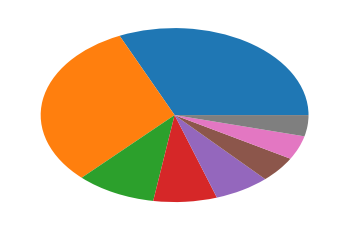

In [91]:
pl.pie(resultsTyp.iloc[:,1])